In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from PLA import PlaPocket
from Regressao_Logistica import RegressaoLogistica
from regressao_linear import RegressaoLinear
import numpy as np

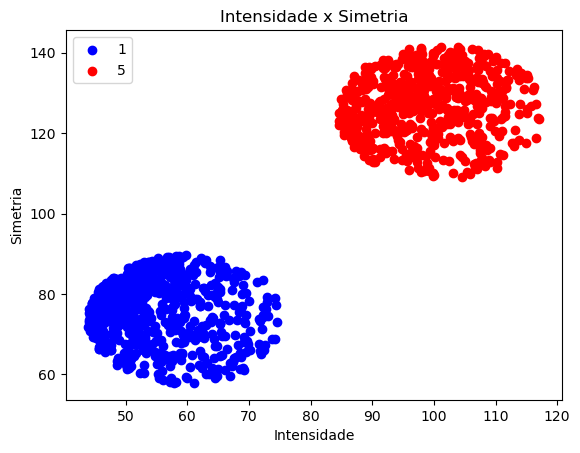

In [15]:
train_1x5 = pd.read_csv("Dados/train_reduzido_filter_1_5.csv", sep=";")
test_1x5 = pd.read_csv("Dados/test_reduzido_filter_1_5.csv", sep=";")

# Separando os dados por classe
train_1 = train_1x5[train_1x5['label'] == 1]
train_5 = train_1x5[train_1x5['label'] == 5]

# Plotando os pontos para cada classe com cores diferentes e legendas
plt.scatter(train_1["intensidade"], train_1["simetria"], c='blue', label='1')
plt.scatter(train_5["intensidade"], train_5["simetria"], c='red', label='5')

plt.xlabel("Intensidade")
plt.ylabel("Simetria")
plt.title("Intensidade x Simetria")
plt.legend()
plt.show()


In [16]:
def padronizar(X_tr):
    for i in range(np.shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
        
    return X_tr

In [17]:
# x treino
X = train_1x5[["intensidade", "simetria"]].values

# Padronizando os dados
X_treino = padronizar(X)

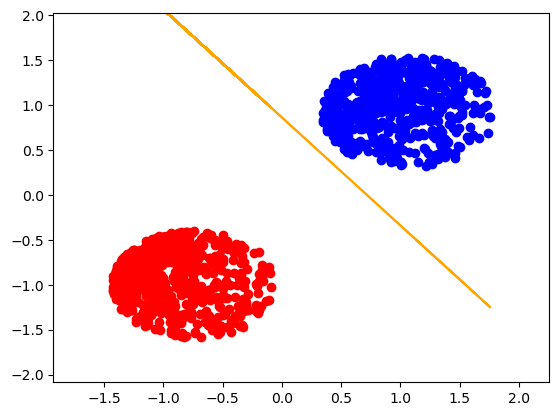

2


In [18]:
#ajustando os valores de y para o PLA
y = train_1x5["label"]
# substitui os valores de y por 1 ou -1
y = y.replace(1, 1)
y = y.replace(5, -1)
y = y.values  

pla = PlaPocket(X_treino, y)
pla.fit()
pla.plot()
print(pla.iteracao)

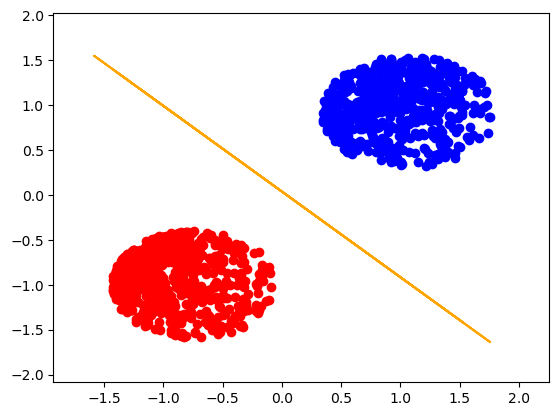

In [19]:
# Ajustando os valores de y para a regresaão logística
y = train_1x5["label"]
# substitui os valores de y por 0 ou 1
y = y.replace(1, 1)
y = y.replace(5, 0)
y = y.values


regressao_logistica = RegressaoLogistica(X_treino, y)
regressao_logistica.fit()
regressao_logistica.plot()


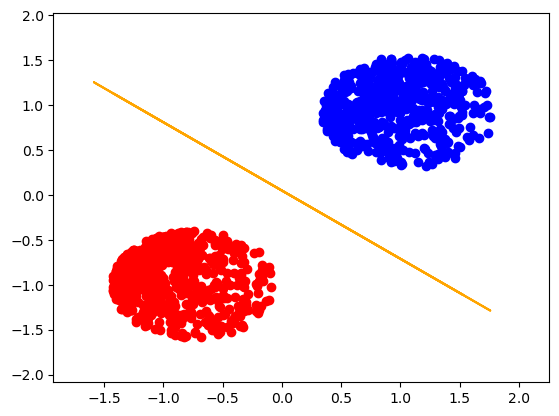

In [20]:
# Ajustando os valores de y para a regresaão logística
y = train_1x5["label"]
# substitui os valores de y por 0 ou 1
y = y.replace(1, 1)
y = y.replace(5, -1)
y = y.values

regressao_logistica = RegressaoLinear(X_treino, y)
regressao_logistica.fit()
regressao_logistica.plot()

In [24]:
def predict(y):
    if y == 1:
        return 1
    else:
        return 5

def acuracia(y, y_pred):
    return (np.sum(y == y_pred)/len(y))*100

X = test_1x5[["intensidade", "simetria"]].values
y_true = test_1x5["label"].values

# Padronizando os dados
X_test = padronizar(X)
y_pla = pla.predict(X_test)
y_pla = [predict(y) for y in y_pla]
y_reglog = regressao_logistica.predict(X_test)
y_reglog = [predict(y) for y in y_reglog]
y_reglin = regressao_logistica.predict(X_test)
y_reglin = [predict(y) for y in y_reglin]

print("Acurácia PLA: ", acuracia(y_true, y_pla))
print("Acurácia Regressão Logística: ", acuracia(y_true, y_reglog))
print("Acurácia Regressão Linear: ", acuracia(y_true, y_reglin))


Acurácia PLA:  100.0
Acurácia Regressão Logística:  100.0
Acurácia Regressão Linear:  100.0


Text(978.81045751634, 0.5, 'Real')

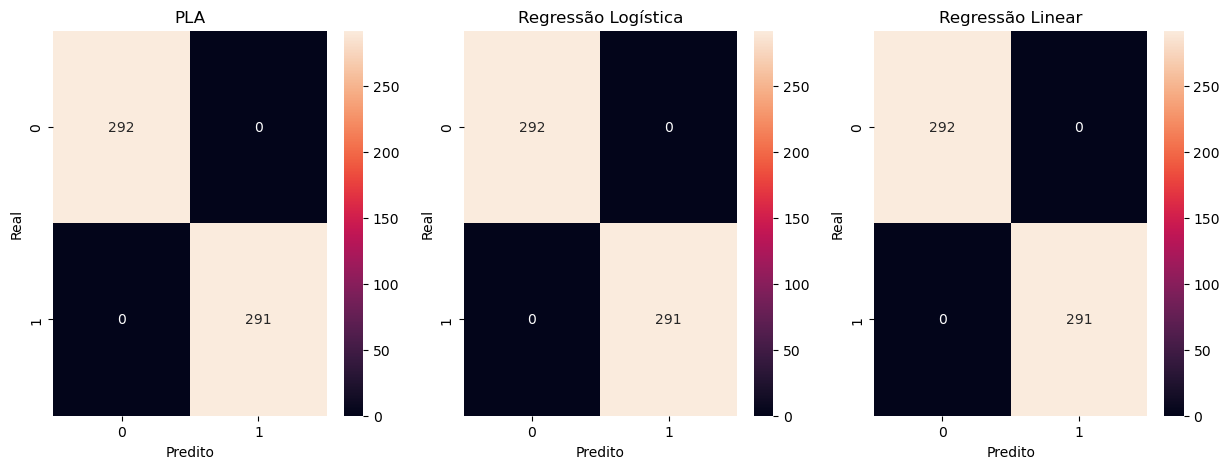

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_1x5["label"].values

cm_pla = confusion_matrix(y_true, y_pla)
cm_reglog = confusion_matrix(y_true, y_reglog)
cm_reglin = confusion_matrix(y_true, y_reglin)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_pla, annot=True, ax=ax[0], fmt='g')
ax[0].set_title("PLA")
ax[0].set_xlabel("Predito")
ax[0].set_ylabel("Real")

sns.heatmap(cm_reglog, annot=True, ax=ax[1], fmt='g')
ax[1].set_title("Regressão Logística")
ax[1].set_xlabel("Predito")
ax[1].set_ylabel("Real")

sns.heatmap(cm_reglin, annot=True, ax=ax[2], fmt='g')
ax[2].set_title("Regressão Linear")
ax[2].set_xlabel("Predito")
ax[2].set_ylabel("Real")
